In [1]:
from main import *
from IPython.display import Image, display

## Utility gains

In [2]:
class SimpleUtility(UtilityFunction):
    def calculate(self, action, favor_size):
        """
        Simple utility calculation:
        - Cooperation: Requester gains +favor_size, responder loses -favor_size.
        - Rejection: No utility change.
        """
        if action == "cooperate":
            return favor_size, -favor_size*0.25
        elif action == "reject":
            return 0, 0
        else:  # No action
            return 0, 0

## Reputation gains

In [3]:
class ReputationManager:
    def __init__(self, gain_base=0.1, loss_base=0.1, min_reputation=-1.0, max_reputation=1.0):
        self.gain_base = gain_base
        self.loss_base = loss_base
        self.min_reputation = min_reputation
        self.max_reputation = max_reputation

    def update_reputation(self, asking, helping, action, favor_size):
        if action == "accept":
            reputation_change = self.gain_base * favor_size
            helping.real_reputation = min(self.max_reputation, helping.real_reputation + reputation_change)
        elif action == "reject":
            reputation_change = self.loss_base * favor_size * (1 + asking.real_reputation/1.5)
            helping.real_reputation = max(self.min_reputation, helping.real_reputation - reputation_change)
        helping.public_reputation = 1 if helping.real_reputation >= 0 else -1

## Intruder of evil strategy

In [ ]:
L = 5  # Grid size
N = 1   # Neighborhood radius

strategy_generator_instance = StrategyGenerator(
    favor_sizes=[1, 3],
    reputation_values=[-1, 1]
)

grid_intruder = GameGrid(L, N, strategy_generator_instance, diagonal_neighbors=True)
own_grid_intruder = ["111111"]*L**2
own_grid_intruder[L**2//2] = "110000"
grid_intruder.setup_from_bitcodes(own_grid_intruder)

game_intruder = Game(grid, SimpleUtility(), ReputationManager())
evolution_intruder = Evolution(game_intruder, inverse_copy_prob=70, inverse_mutation_prob=1000, random_mutation=True)
evolution_intruder.run_interactive(record_data = True)

## Helping Friends Strategy
With higher mutation rate

In [ ]:
L = 7  # Grid size
N = 1   # Neighborhood radius

strategy_generator_instance = StrategyGenerator(
    favor_sizes=[1, 3],
    reputation_values=[-1, 1]
)

grid_hfs = GameGrid(L, N, strategy_generator_instance, diagonal_neighbors=True)
own_grid_hfs = ["110101"]*L**2
grid_hfs.setup_from_bitcodes(own_grid_hfs)

game_hfs = Game(grid_hfs, SimpleUtility(), ReputationManager())
evolution_hfs = Evolution(game_hfs, inverse_copy_prob=70, inverse_mutation_prob=700, random_mutation=True)
evolution_hfs.run_interactive(record_data = True)

In [ ]:
%matplotlib inline
evolution_hfs.plot_history()
matplotlib.use("TkAgg")

## Random grid with bad reputation

In [ ]:
L = 7  # Grid size
N = 1   # Neighborhood radius

strategy_generator_instance = StrategyGenerator(
    favor_sizes=[1, 3],
    reputation_values=[-1, 1]
)

grid_br = GameGrid(L, N, strategy_generator_instance, diagonal_neighbors=True)
for player in grid_br.players:
    player.real_reputation = -0.5
    player.public_reputation = -1

game_br = Game(grid_br, SimpleUtility(), ReputationManager())
evolution_br = Evolution(game_br, inverse_copy_prob=70, inverse_mutation_prob=700, random_mutation=True)
evolution_br.run_interactive(record_data = True)

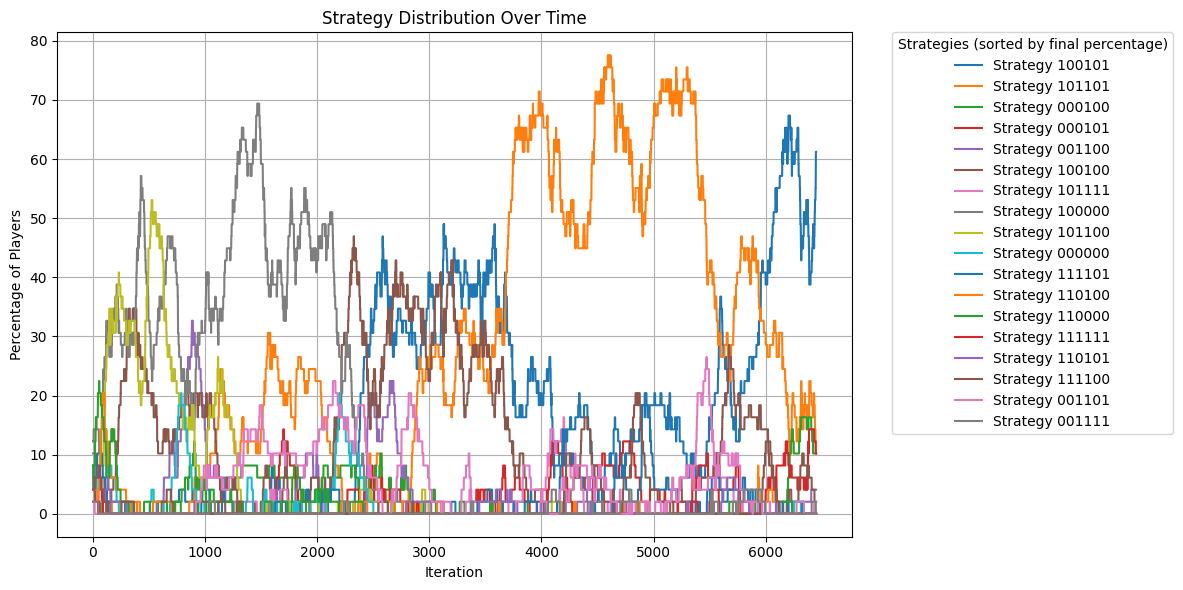

In [5]:
%matplotlib inline
evolution_br.plot_history()
matplotlib.use("TkAgg")

### Old run of random bad reputation

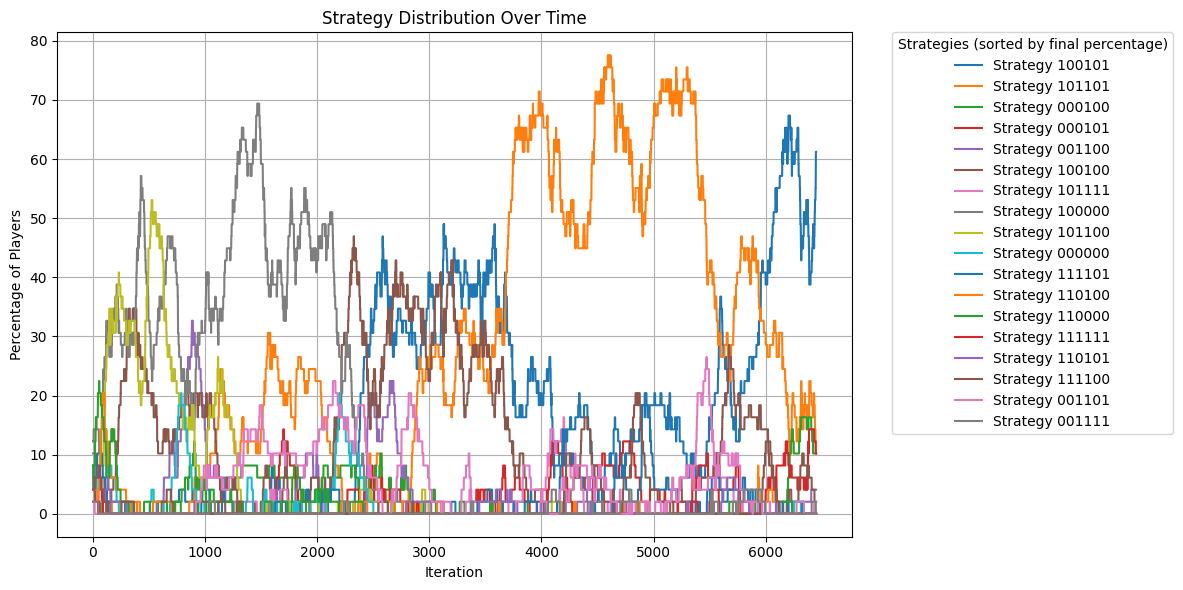

In [7]:
file_path = "plots/random_badrep_4000rounds.png"
display(Image(filename=file_path))

## Change utility gains
Decrease utility loss

In [11]:
class SimpleUtility(UtilityFunction):
    def calculate(self, action, favor_size):
        """
        Simple utility calculation:
        - Cooperation: Requester gains +favor_size, responder loses -favor_size.
        - Rejection: No utility change.
        """
        if action == "cooperate":
            return favor_size, -favor_size/8
        elif action == "reject":
            return 0, 0
        else:  # No action
            return 0, 0

In [ ]:
L = 7  # Grid size
N = 1   # Neighborhood radius

strategy_generator_instance = StrategyGenerator(
    favor_sizes=[1, 3],
    reputation_values=[-1, 1]
)

grid_random = GameGrid(L, N, strategy_generator_instance, diagonal_neighbors=True)

game_random = Game(grid_random, SimpleUtility(), ReputationManager())
evolution_random = Evolution(game_random, inverse_copy_prob=70, inverse_mutation_prob=700, random_mutation=True)
evolution_random.run_interactive(record_data = True)